In [56]:

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from PIL import Image
from IPython.display import clear_output 
path_PT_1 = 'Vison_data/pattern_1'
path_PT_2 = 'Vison_data/pattern_2/pattern_2'
path_new_PT_1 = 'newData/new_pattern_1'
path_new_PT_2 = 'newData/new_pattern_2'



import numpy as np
import imutils

'ready'

'ready'

In [57]:
file_PT1 = np.array(os.listdir(path_PT_1))
file_PT1 = file_PT1[[ (i[-4:] == '.jpg') for i in file_PT1]]

file_PT2 = np.array(os.listdir(path_PT_2))
file_PT2 = file_PT2[[ (i[-4:] == '.jpg') for i in file_PT2]]
file_PT2

array(['pattern_2-1-1-1-D.jpg', 'pattern_2-1-1-10-D.jpg',
       'pattern_2-1-1-11.jpg', 'pattern_2-1-1-12-D.jpg',
       'pattern_2-1-1-13.jpg', 'pattern_2-1-1-14-D.jpg',
       'pattern_2-1-1-15.jpg', 'pattern_2-1-1-16-D.jpg',
       'pattern_2-1-1-17-D.jpg', 'pattern_2-1-1-18-D.jpg',
       'pattern_2-1-1-19-D.jpg', 'pattern_2-1-1-2-D.jpg',
       'pattern_2-1-1-20-D.jpg', 'pattern_2-1-1-21-D.jpg',
       'pattern_2-1-1-22-D.jpg', 'pattern_2-1-1-23-D.jpg',
       'pattern_2-1-1-24-D.jpg', 'pattern_2-1-1-25-D.jpg',
       'pattern_2-1-1-26-D.jpg', 'pattern_2-1-1-27-D.jpg',
       'pattern_2-1-1-28-D.jpg', 'pattern_2-1-1-29-D.jpg',
       'pattern_2-1-1-3-D.jpg', 'pattern_2-1-1-30-D.jpg',
       'pattern_2-1-1-31-D.jpg', 'pattern_2-1-1-32.jpg',
       'pattern_2-1-1-33-D.jpg', 'pattern_2-1-1-34-D.jpg',
       'pattern_2-1-1-35-D.jpg', 'pattern_2-1-1-36-D.jpg',
       'pattern_2-1-1-37-D.jpg', 'pattern_2-1-1-38-D.jpg',
       'pattern_2-1-1-39-D.jpg', 'pattern_2-1-1-4-D.jpg',
       'p

In [58]:
img_test = cv2.imread(os.path.join(path_PT_1,file_PT1[25]))
img_test_bilateral =cv2.bilateralFilter( cv2.cvtColor(img_test,cv2.COLOR_RGB2BGR),-1,13,13)
img_test_gaussian =  cv2.GaussianBlur(cv2.cvtColor(img_test,cv2.COLOR_RGB2BGR),(5,5),9)


cv2.imwrite('img_test_bilateral.jpg',cv2.cvtColor(img_test_bilateral,cv2.COLOR_BGR2RGB))
cv2.imwrite('img_test_gaussian.jpg',cv2.cvtColor(img_test_gaussian,cv2.COLOR_BGR2RGB))

True

In [59]:



def canny_closed(img,th_1 = 100,th_2 =250,kernel_val=1):

    edged = cv2.Canny(img, th_1, th_2)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_val,kernel_val))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    return   edged , closed


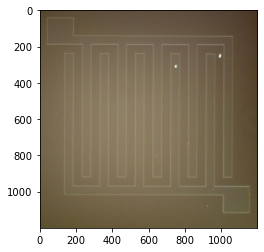

In [60]:
plt.imshow(img_test)

95


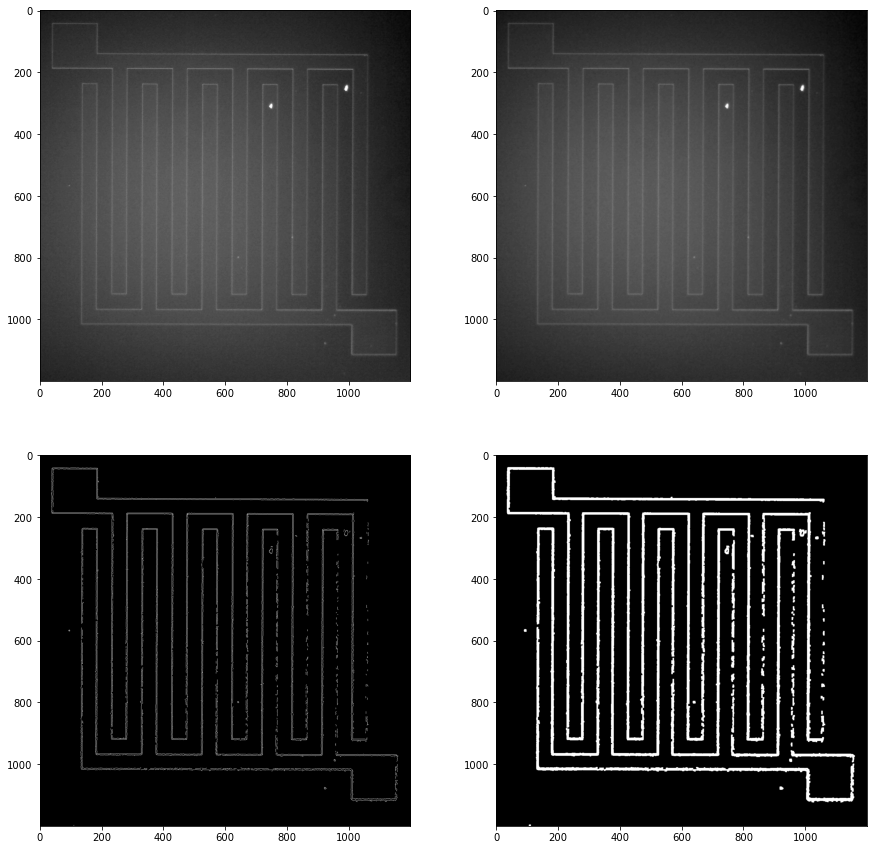

In [61]:
img_test = cv2.imread(os.path.join(path_PT_1,file_PT1[25]),cv2.IMREAD_GRAYSCALE)

img_test_B = cv2.GaussianBlur(img_test,(3,3),3)
_, edg = canny_closed(img_test_B,th_1=40,th_2=30,kernel_val=1)

k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
erosion = cv2.erode(edg, k)
dilate = cv2.dilate(edg, k)

img_open = cv2.morphologyEx(edg,cv2.MORPH_OPEN,k)

f,ax = plt.subplots(2,2)
f.set_size_inches(15,15)

ax[0,0].imshow(img_test,cmap='gray')
ax[0,1].imshow(img_test_B,cmap='gray')
ax[1,0].imshow(edg,cmap='gray')
ax[1,1].imshow(dilate,cmap='gray')

cnt, labels = cv2.connectedComponents(dilate)

print(cnt)

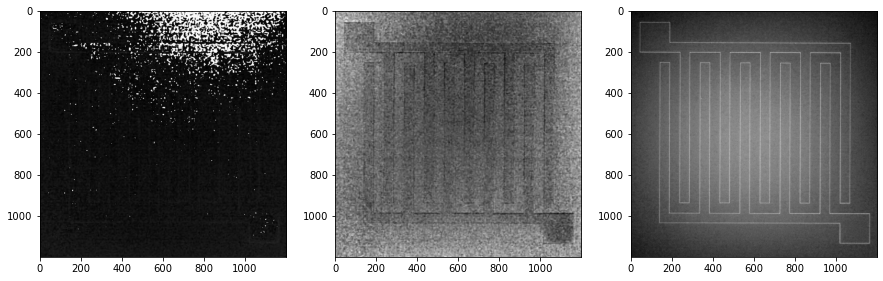

In [62]:
FC = cv2.cvtColor(cv2.imread(os.path.join(path_PT_1,file_PT1[0])),cv2.COLOR_RGB2BGR)
FC_HSV = cv2.cvtColor(FC,cv2.COLOR_BGR2HSV)

f,ax = plt.subplots(1,3)
f.set_size_inches(15,15)
ax[0].imshow(FC_HSV[:,:,0],cmap='gray')
ax[1].imshow(FC_HSV[:,:,1],cmap='gray')
ax[2].imshow(FC_HSV[:,:,2],cmap='gray')
cnt, labels = cv2.connectedComponents(edg)

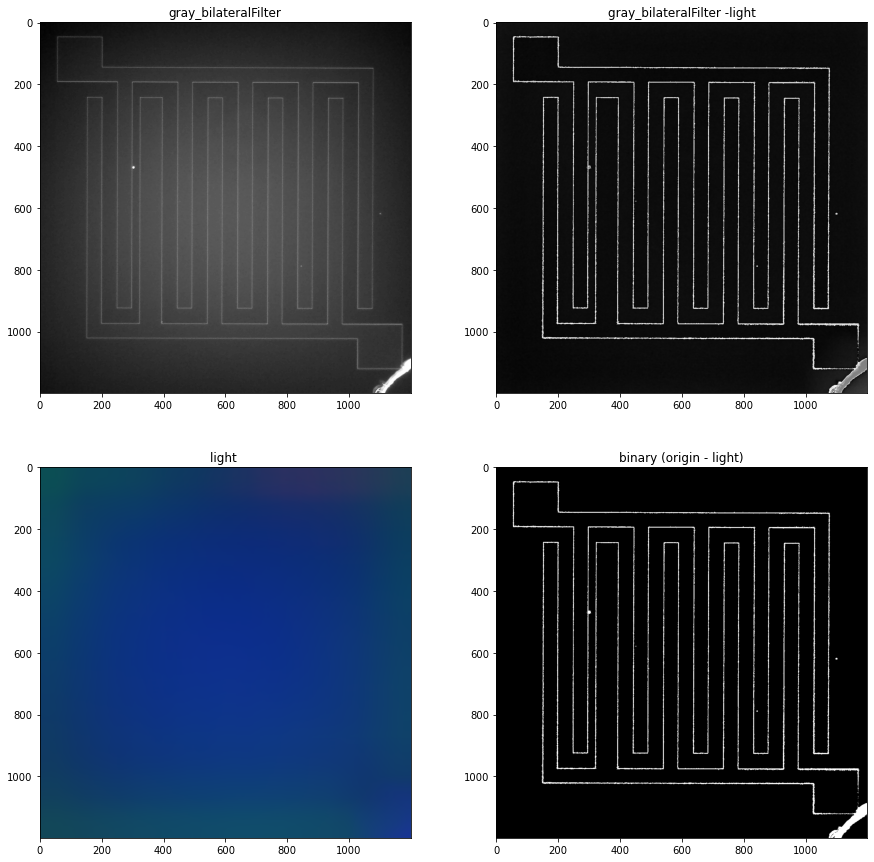

Text(0.5, 1.0, 'result ')

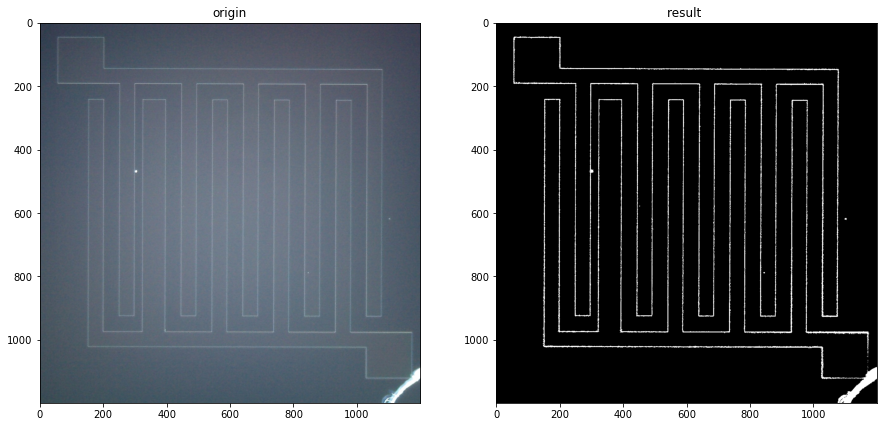

In [63]:
index = 60


origin = cv2.imread(os.path.join(path_PT_1,file_PT1[index]))
origin = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)


a = cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)
a = cv2.bilateralFilter(a,-1,3,3)
b = cv2.cvtColor(origin,cv2.COLOR_BGR2HSV)
b = cv2.blur(b,(199,199),50)
c = 255 - (a - b[:,:,2])

_, d = cv2.threshold(c,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# _, d = canny_closed(d,th_1=50,th_2=100,kernel_val=5)


# k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# d = cv2.morphologyEx(d,cv2.MORPH_CLOSE,k)







f,ax = plt.subplots(2,2)
f.set_size_inches(15,15)
ax[0,0].imshow(a,cmap='gray')
ax[0,0].set_title('gray_bilateralFilter')
ax[1,0].imshow(b,cmap='gray')
ax[1,0].set_title('light ')
ax[0,1].imshow(c,cmap='gray')
ax[0,1].set_title('gray_bilateralFilter -light')
ax[1,1].imshow(d,cmap='gray')
ax[1,1].set_title('binary (origin - light)')
plt.show()



f,ax = plt.subplots(1,2)
f.set_size_inches(15,15)

ax[0].imshow(origin,cmap='gray')
ax[0].set_title('origin')
ax[1].imshow(d,cmap='gray')
ax[1].set_title('result ')








In [64]:



def THRESH_BINARY(img):
#     origin = cv2.imread(os.path.join(path_PT_1,file_PT1[index]))
    origin = img.copy()
    origin = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)


    a = cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)
    a = cv2.bilateralFilter(a,-1,3,3)
    b = cv2.cvtColor(origin,cv2.COLOR_BGR2HSV)
    b = cv2.blur(b,(199,199),50)
    c = 255 - (a - b[:,:,2])

    _, d = cv2.threshold(c,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    return d




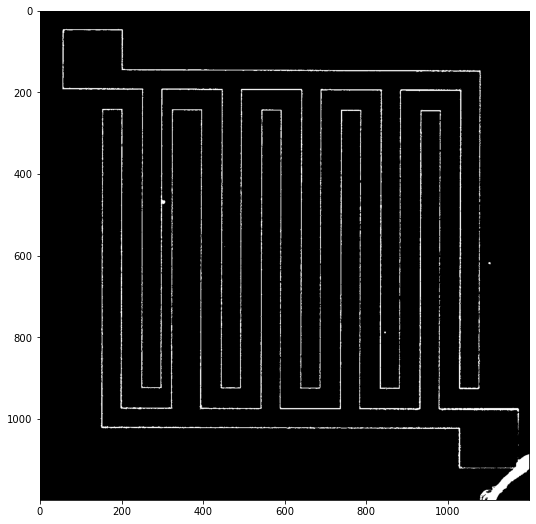

In [65]:
index = 60


origin = cv2.imread(os.path.join(path_PT_1,file_PT1[index]))
origin = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)
a = THRESH_BINARY(origin)

plt.figure(figsize=(9,9))
plt.imshow(a,cmap='gray')

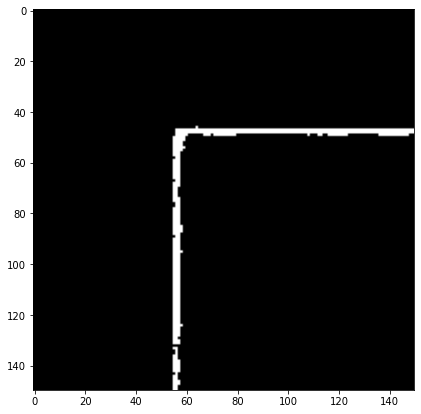

In [66]:
plt.figure(figsize=(7,7))
plt.imshow(a[0:150,0:150],cmap='gray')

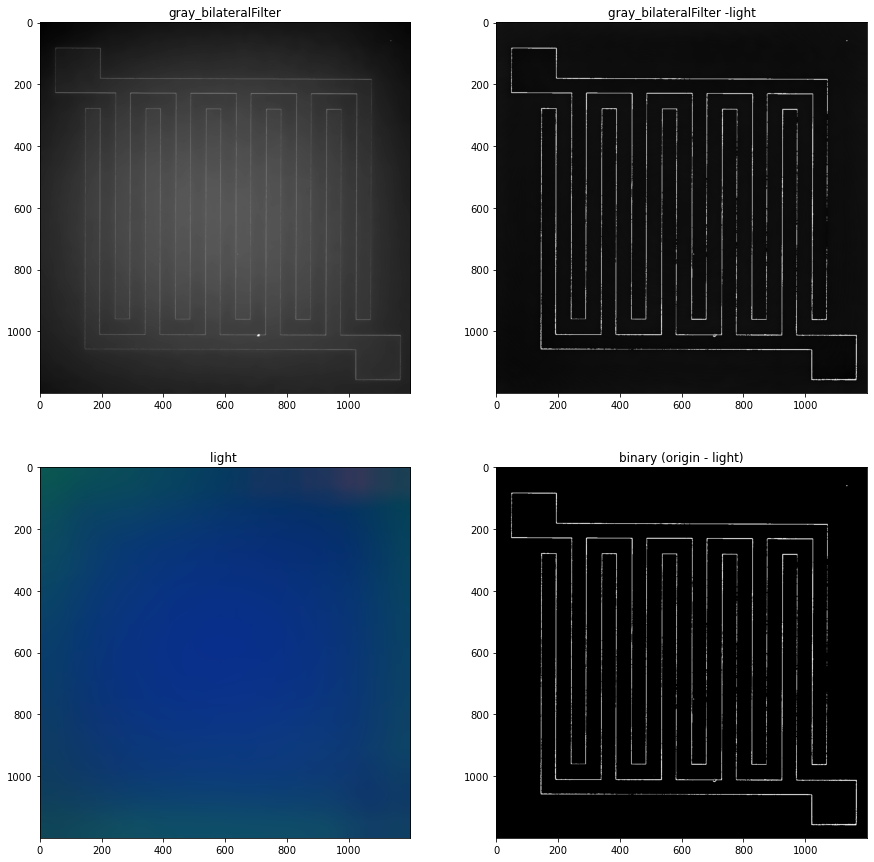

Text(0.5, 1.0, 'result ')

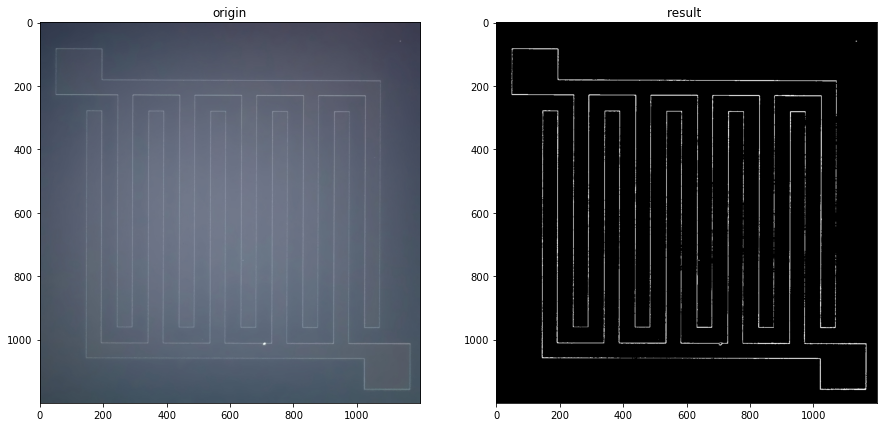

In [67]:



origin = cv2.imread('test.jpg')
origin = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)


a = cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)
a = cv2.bilateralFilter(a,-1,9,9)
b = cv2.cvtColor(origin,cv2.COLOR_BGR2HSV)
b = cv2.blur(b,(199,199),50)
c = 255 - (a - b[:,:,2])

_, d = cv2.threshold(c,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# _, d = canny_closed(d,th_1=50,th_2=100,kernel_val=5)


# k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# d = cv2.morphologyEx(d,cv2.MORPH_CLOSE,k)







f,ax = plt.subplots(2,2)
f.set_size_inches(15,15)
ax[0,0].imshow(a,cmap='gray')
ax[0,0].set_title('gray_bilateralFilter')
ax[1,0].imshow(b,cmap='gray')
ax[1,0].set_title('light ')
ax[0,1].imshow(c,cmap='gray')
ax[0,1].set_title('gray_bilateralFilter -light')
ax[1,1].imshow(d,cmap='gray')
ax[1,1].set_title('binary (origin - light)')
plt.show()



f,ax = plt.subplots(1,2)
f.set_size_inches(15,15)

ax[0].imshow(origin,cmap='gray')
ax[0].set_title('origin')
ax[1].imshow(d,cmap='gray')
ax[1].set_title('result ')






In [68]:
def point(img,grid,ksize=5):
    return img[(grid[0]-(int(ksize/2))):(grid[0]+(int(ksize/2)))+1,(grid[1]-(int(ksize/2))):(grid[1]+(int(ksize/2)))+1]

In [69]:
path_v3_PT_1 ='v3/pattern_1' 

for i,fname in enumerate(file_PT1):
    print(str(i)+' / '+ str(len(file_PT1)))
    clear_output(wait=True)
    ti = cv2.imread(os.path.join(path_PT_1,fname))
    ti = cv2.resize(ti,(640,640))
    at_h = cv2.cvtColor(ti,cv2.COLOR_RGB2HSV)
    at_hb = cv2.blur(at_h,(25,25),75)
    at_h_2 = at_h.copy()
    at_h_2[:,:,2] = at_h[:,:,2] - (at_hb[:,:,2]*0.5).astype(int)
    newti = cv2.bilateralFilter(at_h_2,-1,13,51)
    cv2.imwrite(os.path.join(path_v3_PT_1,fname),cv2.cvtColor(newti,cv2.COLOR_HSV2RGB))
    plt.show()
# clear_output(wait=True)
print('completed')

completed


In [70]:
path_v3_PT_2 ='v3/pattern_2' 

for i,fname in enumerate(file_PT2):
    print(str(i)+' / '+ str(len(file_PT2)))
    clear_output(wait=True)
    ti = cv2.imread(os.path.join(path_PT_2,fname))
    ti = cv2.resize(ti,(640,640))
    newti = cv2.bilateralFilter(ti,-1,13,51)
    at_h = cv2.cvtColor(newti,cv2.COLOR_RGB2HSV)
    at_hb = cv2.blur(at_h,(199,199),50)
    at_h_2 = at_h.copy()
    at_h_2[:,:,2] = at_h[:,:,2] - (at_hb[:,:,2]*0.5).astype(int)
    
    cv2.imwrite(os.path.join(path_v3_PT_2,fname),cv2.cvtColor(at_h_2,cv2.COLOR_HSV2RGB))
    plt.show()
# clear_output(wait=True)
print('completed')

completed


In [71]:
path_ori_640_PT_1 ='origin_640\pattern_1' 

for i,fname in enumerate(file_PT1):
    print(str(i)+' / '+ str(len(file_PT1)))
    clear_output(wait=True)
    ti = cv2.imread(os.path.join(path_PT_1,fname))
    ti = cv2.resize(ti,(640,640))
    cv2.imwrite(os.path.join(path_ori_640_PT_1,fname),ti)
    plt.show()

print('completed')


path_ori_640_PT_2 ='origin_640\pattern_2' 

for i,fname in enumerate(file_PT2):
    print(str(i)+' / '+ str(len(file_PT2)))
    clear_output(wait=True)
    ti = cv2.imread(os.path.join(path_PT_2,fname))
    ti = cv2.resize(ti,(640,640))
    cv2.imwrite(os.path.join(path_ori_640_PT_2,fname),ti)
    plt.show()

print('completed')

completed


In [72]:
at = cv2.imread( os.path.join(path_B_PT_1,'pattern_1-1-1-19-D.jpg'))
plt.imshow(at)

NameError: name 'path_B_PT_1' is not defined

In [ ]:

origin = at.copy()
# origin = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)


a = cv2.cvtColor(origin,cv2.COLOR_RGB2HSV)
a = cv2.bilateralFilter(a,-1,9,9)
b = cv2.cvtColor(origin,cv2.COLOR_RGB2HSV)
b = cv2.blur(b,(199,199),50)
b_1 = b[:,:,2]
c[:,:,1] = c[:,:,1] -  b_1
c = a.copy()



# _, d = cv2.threshold(c,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# _, d = canny_closed(d,th_1=50,th_2=100,kernel_val=5)


# k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# d = cv2.morphologyEx(d,cv2.MORPH_CLOSE,k)







f,ax = plt.subplots(2,2)
f.set_size_inches(15,15)
ax[0,0].imshow(cv2.cvtColor(a,cv2.COLOR_HSV2BGR))
ax[0,0].set_title('gray_bilateralFilter')
ax[1,0].imshow(b_1,cmap='gray')
ax[1,0].set_title('light ')
ax[0,1].imshow(cv2.cvtColor(c,cv2.COLOR_HSV2BGR))
ax[0,1].set_title('gray_bilateralFilter -light')
ax[1,1].imshow(d,cmap='gray')
ax[1,1].set_title('binary (origin - light)')
plt.show()



f,ax = plt.subplots(1,2)
f.set_size_inches(15,15)

ax[0].imshow(origin,cmap='gray')
ax[0].set_title('origin')
ax[1].imshow(d,cmap='gray')
ax[1].set_title('result ')

In [ ]:
c[:,:,1]

In [ ]:
b_1

In [ ]:
c[:,:,1] = c[:,:,1] - b_1
c[:,:,1]

In [ ]:
at


c_1 = np.zeros_like(c)

c_1[:,:,0] = c[:,:,0]
c_1[:,:,2] = c[:,:,2]

b_1 = b[:,:,1]
c_1[:,:,1] = c[:,:,1] - (b_1*0.1).astype(int)

plt.imshow(cv2.cvtColor(c_1,cv2.COLOR_HSV2BGR))

In [ ]:
at_h = cv2.cvtColor(at,cv2.COLOR_RGB2HSV)
at_hb = b = cv2.blur(at_h,(199,199),50)

In [ ]:
plt.imshow(cv2.cvtColor(at_h,cv2.COLOR_HSV2BGR))
plt.show()
plt.imshow(cv2.cvtColor(at_hb,cv2.COLOR_HSV2BGR))

In [ ]:
at_h = cv2.cvtColor(at,cv2.COLOR_RGB2HSV)
at_hb = b = cv2.blur(at_h,(199,199),50)
at_h_2 = at_h.copy()
at_h_2[:,:,2] = at_h[:,:,2] - (at_hb[:,:,2]*0.5).astype(int)
F_at = cv2.cvtColor(at_h_2,cv2.COLOR_HSV2BGR)
plt.imshow(F_at)

In [ ]:
cv2.imwrite

In [ ]:
cv2.imwrite('chroma_5.jpg',cv2.cvtColor(F_at,cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(c)

In [ ]:
plt.imshow(cv2.cvtColor(at,cv2.COLOR_RGB2BGR))

In [ ]:
path_B_PT_2='bilateral/new_pattern_2'

for i,fname in enumerate(file_PT2):pattern_1-1-1-19-D.jpg
    print(str(i)+' / '+ str(len(file_PT2)))
    clear_output(wait=True)
    ti = cv2.imread(os.path.join(path_PT_2,fname))
    newti = cv2.bilateralFilter(ti,-1,13,13)
    cv2.imwrite(os.path.join(path_B_PT_2,fname),newti)

clear_output(wait=True)
print('completed')

## 이물질 이미지 증식

### 기존 이미지에서 이물질 부분 추출하기

In [ ]:
path_v3_PT_1 ='v3/pattern_1' 
path_v3_PT_2 ='v3/pattern_2'

foreign = [
'pattern_2-1-1-74-D.jpg',
'pattern_2-1-6-12-D.jpg',
'pattern_2-1-1-53-D.jpg',
'pattern_2-1-1-54-D.jpg',
'pattern_2-1-1-35-D.jpg',
'pattern_1-1-9-3-D.jpg',
'pattern_1-1-4-3-D.jpg',
'pattern_2-1-9-1-D.jpg',
'pattern_2-1-4-8-D.jpg',
'pattern_2-1-1-85-D.jpg',
'pattern_1-1-3-7-D.jpg',
'pattern_1-1-8-7-D.jpg',
'pattern_1-1-2-7-D.jpg',
'pattern_1-1-6-3-D.jpg',
'pattern_1-1-3-9-D.jpg',
'pattern_1-1-6-4-D.jpg',
'pattern_1-1-3-4-D.jpg',
'pattern_1-1-4-6-D.jpg',
'pattern_1-1-1-54-D.jpg',
'pattern_1-1-5-10-D.jpg',
'pattern_1-1-1-28-D.jpg',
'pattern_1-1-7-6-D.jpg',
'pattern_1-1-4-10-D.jpg',
'pattern_1-1-7-4-D.jpg',
'pattern_1-1-8-3-D.jpg',
'pattern_2-1-8-6-D.jpg',
]

for i in file_PT1:
    if i in foreign:
        temp = (cv2.imread(os.path.join(path_v3_PT_1,i)))
        cv2.imwrite(os.path.join('foreign',i),temp)
        
for i in file_PT2:
    if i in foreign:
#         li_foreign.append(cv2.imread(os.path.join(path_v3_PT_2,i)))
        
        temp = (cv2.imread(os.path.join(path_v3_PT_2,i)))
        cv2.imwrite(os.path.join('foreign',i),temp)

file_foreign = np.array(os.listdir('foreign'))
file_foreign[:5]

In [ ]:
img_foreign = []
for i in file_foreign:
    img_foreign.append(cv2.imread(os.path.join('foreign',i)))
plt.imshow(img_foreign[24])

In [ ]:
file_foreign[14:20]

In [ ]:

findex = 24
t = img_foreign[findex].copy()[155:175,510:525]

print(file_foreign[findex])
plt.figure(figsize=(9,9))
plt.imshow(t)

In [ ]:

x = cv2.cvtColor(t,cv2.COLOR_RGB2GRAY)

Color_min = 66

_,t_b = cv2.threshold(x,Color_min,255,cv2.THRESH_TOZERO)
x_after = cv2.cvtColor(t_b,cv2.COLOR_GRAY2BGR)
t_ba = np.zeros((x_after.shape[0],x_after.shape[1],x_after.shape[2]+1))
t_ba[:,:,:3] = x_after
_,alpha = cv2.threshold(t_b,Color_min,255,cv2.THRESH_BINARY)
t_ba[:,:,3] = alpha
t_ba = t_ba.astype(int)
plt.imshow(t)
plt.show()
plt.imshow(t_ba)

In [ ]:
cv2.imwrite(os.path.join('foreign_point',f'foreign_{findex}'+'.png'),t_ba)

In [ ]:

kernel = np.ones((3, 1), np.uint8)
kernel_2 = np.ones((9, 9), np.uint8)

# tttt = cv2.morphologyEx(t_b,cv2.MORPH_OPEN,kernel) 
tttt = cv2.morphologyEx(t_b,cv2.MORPH_CLOSE,kernel_2) 
plt.imshow(tttt)

In [ ]:
# x_after = tttt.copy()

x_after = cv2.cvtColor(tttt,cv2.COLOR_GRAY2BGR)

t_ba = np.zeros((x_after.shape[0],x_after.shape[1],x_after.shape[2]+1))
t_ba[:,:,:3] = x_after
_,alpha = cv2.threshold(tttt,0,255,cv2.THRESH_BINARY)
t_ba[:,:,3] = alpha
t_ba = t_ba.astype(int)
t_ba[:,:,3] = alpha
t_ba = t_ba.astype(int)
plt.imshow(t)
plt.show()
plt.imshow(t_ba)

In [ ]:
img_foreign = []
file_foreign = np.array(os.listdir('foreign_point'))
# temp_arr = np.array(file_foreign).reshape(5,5)
for i in file_foreign:
    img_foreign.append(cv2.imread(os.path.join('foreign_point',i)))
    

for i in range(len(img_foreign)):
    plt.imshow(img_foreign[i])
    plt.show()

In [ ]:
len(img_foreign)

In [ ]:
img_index = 0
random = 0
f'{img_index+1}/{len(img_foreign)}'

In [ ]:

f'{img_index+1}/{len(img_foreign)}'
ti = img_foreign[img_index]
plt.imshow(ti)
img_index += 1
random = 0

In [ ]:
Tti =transImg(ti)


# plt.imshow(Tti)


x_after = Tti.copy()
t_ba = np.zeros((x_after.shape[0],x_after.shape[1],x_after.shape[2]+1))
t_ba[:,:,:3] = x_after
_,alpha = cv2.threshold(cv2.cvtColor(Tti,cv2.COLOR_RGB2GRAY),0,255,cv2.THRESH_BINARY)
t_ba[:,:,3] = alpha
t_ba = t_ba.astype(int)
t_ba[:,:,3] = alpha
t_ba = t_ba.astype(int)
plt.imshow(t_ba)



cv2.imwrite(os.path.join('foreign_trans',f'foreign_{img_index}_v{random}'+'.png'),random)
random += 1
print(random)

In [ ]:
def transImg(img):


    timg = img.copy()
    pts1 = np.float32([[0, 0], [0, timg.shape[0]-int(timg.shape[0]*0.2)], [timg.shape[1]-int(timg.shape[1]*0.2), 0]])
    pts2 = np.float32([[0, 0], [0, timg.shape[0]-int(timg.shape[0]*0.2)+np.random.randint(-int(timg.shape[0]*0.2),int(timg.shape[0]*0.2))], 
                       [timg.shape[1]-int(timg.shape[1]*0.2)+np.random.randint(-int(timg.shape[1]*0.2),int(timg.shape[1]*0.2)), 0]])

    print(G_ori)
    print(G_cus)



    rows, cols = timg.shape[:2]
    (cX, cY) = (rows // 2, cols // 2)


    # 아핀변환
    mtrx = cv2.getAffineTransform(pts1, pts2)
    dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), int(rows*1.5)))

    # 단순 회전
    rotated = imutils.rotate_bound(dst,np.random.randint(0,360))
  
    # 크기맞춤
    imgO = getO(rotated)

    return imgO

In [ ]:

def getO(img):
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    for i,v in enumerate(img_gray):
        if any(v):
            x_min = i
            break

    for i,v in enumerate(img_gray[::-1]):
        if any(v):
            x_max = len(img_gray)-i
            break

    for i,v in enumerate(img_gray.T):
        if any(v):
            y_min = i
            break

    for i,v in enumerate(img_gray.T[::-1]):
        if any(v):
            y_max = len(img_gray.T)-i
            break


    return img[x_min:x_max,y_min:y_max]

## 정상이미지와 이물질 이미지 합성

In [ ]:
path_new_Data_foreign = 'new Data_foreign'

img_ori_1 = cv2.imread(os.path.join(path_new_Data_foreign,'pattern_1_Origin.jpg'))
img_ori_2 = cv2.imread(os.path.join(path_new_Data_foreign,'pattern_2_Origin.jpg'))

plt.imshow(img_ori_1)
plt.show()
plt.imshow(img_ori_2)


In [ ]:
count = 0
foreigns = []



for i in os.listdir('foreign_trans'):
    rl = np.random.choice(os.listdir(os.path.join('foreign_trans',i)),8)
    for imgName in rl:
        
        foreign = cv2.imread(os.path.join('foreign_trans',i,imgName))
        fx = foreign.shape[0]
        fy = foreign.shape[1]
        newImg = img_ori_1.copy()


        rx = np.random.randint(0,(newImg.shape[0]-fx))
        ry = np.random.randint(0,(newImg.shape[1]-fy))

        
        
        foreign_arr = np.array(foreign)
        img_arr =np.array(newImg[rx:(rx+fx),ry:(ry+fy)])
        ia = img_arr.reshape(-1)
        fa = foreign_arr.reshape(-1)
        ia[0<fa] = fa[0<fa]
        img_arr_2 = ia.reshape(img_arr.shape)
        newImg[rx:(rx+fx),ry:(ry+fy)] = cv2.medianBlur(img_arr_2,7)

        cv2.imwrite(os.path.join(path_new_Data_foreign,f'p1_{count}.jpg'),newImg)
        
        count += 1
        


In [ ]:
count = 0
foreigns = []
path_new_Data_foreign = 'new Data_foreign_3'


for i in range(25):
    rl = np.random.choice( os.listdir('foreign_trans/p_a'),4)
    
    newImg = img_ori_1.copy()
    
    for imgName in rl:
        foreign = cv2.imread(os.path.join('foreign_trans/p_a',imgName))
        fx = foreign.shape[0]
        fy = foreign.shape[1]



        rx = np.random.randint(0,(newImg.shape[0]-fx))
        ry = np.random.randint(0,(newImg.shape[1]-fy))

        
        
        foreign_arr = np.array(foreign)
        img_arr =np.array(newImg[rx:(rx+fx),ry:(ry+fy)])
        ia = img_arr.reshape(-1)
        fa = foreign_arr.reshape(-1)
        ia[0<fa] = fa[0<fa]
        img_arr_2 = ia.reshape(img_arr.shape)
        newImg[rx:(rx+fx),ry:(ry+fy)] = cv2.medianBlur(img_arr_2,7)

    cv2.imwrite(os.path.join(path_new_Data_foreign,f'p1_{count}.jpg'),newImg)
    count += 1
        


In [ ]:
foreign = cv2.imread(os.path.join('foreign_trans',i,imgName))
plt.imshow(foreign)

In [ ]:
foreign_arr = np.array(foreign)
img_arr =np.array(newImg[rx:(rx+fx),ry:(ry+fy)])


ia = img_arr.reshape(-1)
fa = foreign_arr.reshape(-1)
ia[0<fa] = fa[0<fa]
img_arr_2 = ia.reshape(img_arr.shape)




newImg[rx:(rx+fx),ry:(ry+fy)] = img_arr_2



plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(newImg,cv2.COLOR_RGB2BGR))
        

In [ ]:
ia = img_arr.reshape(-1)
fa = foreign_arr.reshape(-1)

ia.shape, fa.shape

In [ ]:
ia[0<fa] = fa[0<fa]

img_arr_2 = ia.reshape(img_arr.shape)

In [ ]:
img_arr[:,:,0].shape,(foreign_arr[:,:,0]==True).shape , foreign_arr[:,:,0].shape

In [ ]:
pd.DataFrame((img_arr + foreign_arr).reshape(-1)).value_counts().sort_index(ascending=False)

In [ ]:
cv2.threshold

In [ ]:
print(tx.shape)
print(t_.shape)

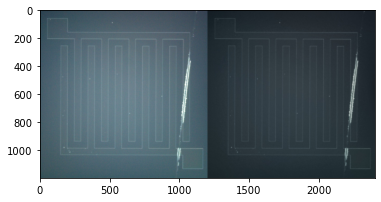

True

In [93]:
path_t1= 'bilateral/new_pattern_1/51__pattern_1-1-1-30-D.jpg'
path_t2 = 'Vison_data/pattern_1/pattern_1-1-1-30-D.jpg'

t1  = cv2.resize(cv2.imread(path_t1),(1200,1200))
t2  = cv2.resize(cv2.imread(path_t2),(1200,1200))
t3 = cv2.hconcat([t2,t1])

plt.imshow(cv2.cvtColor(t3,cv2.COLOR_RGB2BGR))
plt.show()
# cv2.imwrite('ex_bilateral_1-1-1-30-D.jpg',t3)